Context: You are the cybersecurity expert of a company. In the last month, some cybersecurity events with different durations and patterns have been registered

1) Most targeted Destination IP addresses
2) Most logical ports attacked
3) Most Frequently/common type of attack
4) Different time of the day, hours, or night
5) Find the pattern

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipaddress
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
from datetime import datetime, timedelta
import math
import missingno as msno
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [49]:
df = pd.read_csv('Cybersecurity_attacks.csv')
df.shape

(178031, 11)

In [50]:
df.columns

Index(['Attack category', 'Attack subcategory', 'Protocol', 'Source IP',
       'Source Port', 'Destination IP', 'Destination Port', 'Attack Name',
       'Attack Reference', '.', 'Time'],
      dtype='object')

In [51]:
df.head()

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,.,Time
0,Reconnaissance,HTTP,tcp,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,.,1421927414-1421927416
1,Exploits,Unix 'r' Service,udp,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,.,1421927415-1421927415
2,Exploits,Browser,tcp,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,.,1421927416-1421927416
3,Exploits,Miscellaneous Batch,tcp,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,.,1421927417-1421927417
4,Exploits,Cisco IOS,tcp,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,.,1421927418-1421927418


Now, We're splitting the time column by start and last time

In [52]:
df[['Start time','Last time']] = df['Time'].str.split('-',expand=True)
df.head()

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,.,Time,Start time,Last time
0,Reconnaissance,HTTP,tcp,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,.,1421927414-1421927416,1421927414,1421927416
1,Exploits,Unix 'r' Service,udp,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,.,1421927415-1421927415,1421927415,1421927415
2,Exploits,Browser,tcp,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,.,1421927416-1421927416,1421927416,1421927416
3,Exploits,Miscellaneous Batch,tcp,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,.,1421927417-1421927417,1421927417,1421927417
4,Exploits,Cisco IOS,tcp,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,.,1421927418-1421927418,1421927418,1421927418


In [53]:
df['.'].unique()

array(['.'], dtype=object)

In [54]:
df = df.drop(['.','Time'],axis=1) #Drop columns and make a copy in memory of the object
df.head()

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start time,Last time
0,Reconnaissance,HTTP,tcp,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,1421927414,1421927416
1,Exploits,Unix 'r' Service,udp,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,1421927415,1421927415
2,Exploits,Browser,tcp,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,1421927416,1421927416
3,Exploits,Miscellaneous Batch,tcp,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,1421927417,1421927417
4,Exploits,Cisco IOS,tcp,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,1421927418,1421927418


In [55]:
df.shape

(178031, 11)

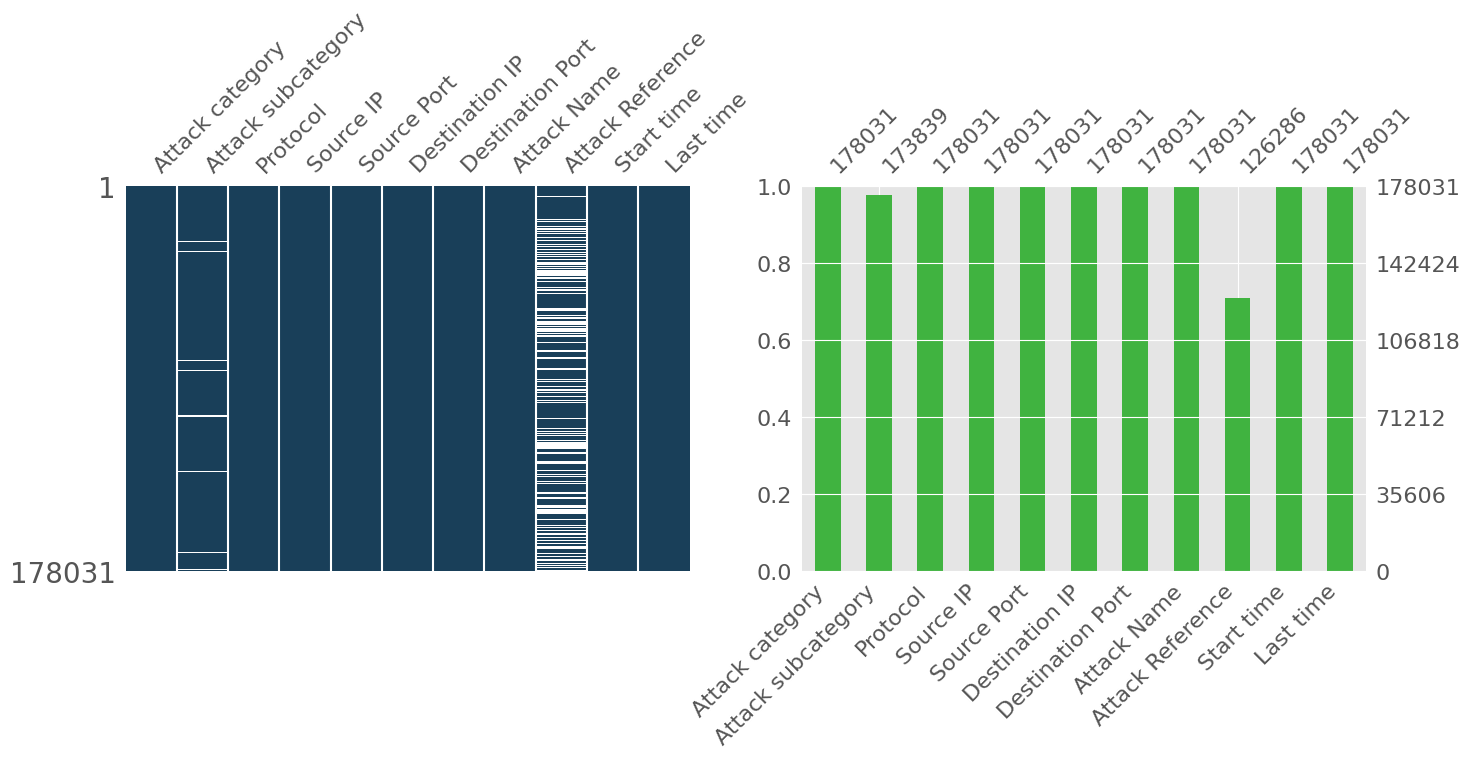

In [56]:
figure, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 5))
msno.matrix(df, ax=ax1, sparkline=False, color=(0.1, 0.25, 0.35))
msno.bar(df, ax=ax2, color=(0.25, 0.7, 0.25))
plt.show()

In [26]:
df["Attack subcategory"] = df["Attack subcategory"].fillna("Not registered")
df.isnull().sum()

,0
Attack category,0
Attack subcategory,0
Protocol,0
Source IP,0
Source Port,0
Destination IP,0
Destination Port,0
Attack Name,0
Attack Reference,6347
Start time,1


In [27]:
df[pd.isnull(df).any(axis = 1)].shape

(6348, 11)

In [28]:
df[df.duplicated()]

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start time,Last time


In [31]:
invalid_SP = (df['Source Port'] < 0) | (df['Source Port'] > 65535)
invalid_DP = (df['Destination Port'] < 0) | (df['Destination Port'] > 65535)
df[invalid_SP | invalid_DP]


,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start time,Last time


In [32]:
df = df[-(invalid_SP | invalid_DP)].reset_index(drop=True)
df.shape

(31792, 11)

In [33]:
print('Total number of different protocol:' , len(df['Protocol'].unique()))
print('Total number of different Attack categories:' , len(df['Attack category'].unique()))
df['Protocol'].unique()

Total number of different protocol: 131
Total number of different Attack categories: 13


array(['tcp', 'udp', 'Tcp', 'UDP', 'ospf', 'sctp', 'sep', 'mobile',
       'sun-nd', 'swipe', 'pim', 'ggp', 'ip', 'ipnip', 'st2', 'cbt',
       'egp', 'argus', 'bbn-rcc', 'chaos', 'emcon', 'igp', 'nvp', 'pup',
       'xnet', 'mux', 'dcn', 'hmp', 'prm', 'trunk-1', 'xns-idp',
       'trunk-2', 'leaf-1', 'leaf-2', 'irtp', 'rdp', 'iso-tp4', 'netblt',
       'merit-inp', 'mfe-nsp', '3pc', 'idpr', 'xtp', 'ddp', 'idpr-cmtp',
       'tp++', 'il', 'ipv6', 'idrp', 'ipv6-frag', 'ipv6-route', 'sdrp',
       'gre', 'mhrp', 'rsvp', 'bna', 'i-nlsp', 'rvd', 'narp', 'ipv6-no',
       'skip', 'tlsp', 'ipv6-opts', 'any', 'cftp', 'kryptolan',
       'sat-expak', 'ippc', 'sat-mon', 'cpnx', 'ipcv', 'visa', 'cphb',
       'wsn', 'br-sat-mon', 'pvp', 'wb-expak', 'wb-mon', 'iso-ip',
       'secure-vmtp', 'vmtp', 'ttp', 'vines', 'nsfnet-igp', 'dgp',
       'eigrp', 'tcf', 'sprite-rpc', 'larp', 'mtp', 'ax.25', 'ipip',
       'micp', 'aes-sp3-d', 'encap', 'etherip', 'gmtp', 'pri-enc', 'ifmp',
       'pnni', 'aris

In [34]:
df['Attack category'].unique()

array(['Reconnaissance', 'Exploits', 'DoS', 'Generic', 'Shellcode',
       ' Fuzzers', 'Worms', 'Backdoors', 'Analysis', ' Fuzzers ',
       ' Reconnaissance ', 'Backdoor', ' Shellcode '], dtype=object)

In [36]:
df['Protocol'] = df['Protocol'].str.upper().str.strip()
df['Attack category'] = df['Attack category'].str.upper().str.strip()
df['Attack category'] = df['Attack category'].str.strip().replace('BACKDOORS','BACKDOORS')
df

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start time,Last time
0,RECONNAISSANCE,HTTP,TCP,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,1421927414,1421927416
1,EXPLOITS,Unix 'r' Service,UDP,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,1421927415,1421927415
2,EXPLOITS,Browser,TCP,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,1421927416,1421927416
3,EXPLOITS,Miscellaneous Batch,TCP,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,1421927417,1421927417
4,EXPLOITS,Cisco IOS,TCP,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,1421927418,1421927418
...,...,...,...,...,...,...,...,...,...,...,...
31787,FUZZERS,BGP,TCP,175.45.176.1,65494,149.171.126.11,179,BGP Open: Params: Long Parameter Entries (http...,NaN,1424223622,1424223663
31788,FUZZERS,BGP,TCP,175.45.176.1,64162,149.171.126.11,179,BGP Open: Params: Long Parameter Entries (http...,NaN,1424223623,1424223623
31789,GENERIC,IXIA,UDP,175.45.176.0,1043,149.171.126.12,53,Microsoft_DNS_Server_ANY_Query_Cache_Weakness_...,CVE 2009-0234 (http://cve.mitre.org/cgi-bin/cv...,1424223623,1424223623
31790,GENERIC,IXIA,UDP,175.45.176.0,47439,149.171.126.12,53,Microsoft_DNS_Server_ANY_Query_Cache_Weakness_...,CVE 2009-0234 (http://cve.mitre.org/cgi-bin/cv...,1424223623,1424223623


In [37]:
print('Total number of different protocols:', len(df['Protocol'].unique()))
print('Total number of different Attack categories:', len(df['Attack category'].unique()))


Total number of different protocols: 129
Total number of different Attack categories: 10


In [38]:
df[pd.isnull(df['Attack Reference'])][:5]

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start time,Last time
258,FUZZERS,OSPF,OSPF,175.45.176.3,0,149.171.126.14,0,"Fuzzer: OSPF Hello Packet: Invalid Length, Lon...",NaN,1421927643,1421927645
500,FUZZERS,BGP,TCP,175.45.176.2,63685,149.171.126.13,179,"BGP Header: Random Payload, Bad Length (https:...",NaN,1421927755,1421927755
501,FUZZERS,BGP,TCP,175.45.176.2,48413,149.171.126.13,179,"BGP Header: Random Payload, Bad Length (https:...",NaN,1421927755,1421927756
502,FUZZERS,BGP,TCP,175.45.176.2,30451,149.171.126.13,179,"BGP Header: Random Payload, Bad Length (https:...",NaN,1421927756,1421927756
503,FUZZERS,BGP,TCP,175.45.176.2,58077,149.171.126.13,179,"BGP Header: Random Payload, Bad Length (https:...",NaN,1421927756,1421927756


In [39]:
print(df[pd.isnull(df['Attack Reference'])]['Attack category'].value_counts())

Attack category
FUZZERS           4449
RECONNAISSANCE    1626
ANALYSIS           185
SHELLCODE           57
GENERIC             20
DOS                  5
BACKDOOR             4
WORMS                1
Name: count, dtype: int64


In [40]:
print(df['Attack category'].value_counts())

Attack category
EXPLOITS          11064
FUZZERS            8438
RECONNAISSANCE     3380
DOS                3373
GENERIC            3360
BACKDOOR           1130
ANALYSIS            443
SHELLCODE           312
BACKDOORS           256
WORMS                36
Name: count, dtype: int64


In [41]:
((df[pd.isnull(df['Attack Reference'])]['Attack category'].value_counts()/df['Attack category'].value_counts())*100).dropna().sort_values(ascending=False)

,count
Attack category,
FUZZERS,52.725764
RECONNAISSANCE,48.106509
ANALYSIS,41.760722
SHELLCODE,18.269231
WORMS,2.777778
GENERIC,0.595238
BACKDOOR,0.353982
DOS,0.148236


In [45]:
tcp_ports =  pd.read_csv('TCP-ports.csv')
tcp_ports['Service'] = tcp_ports['Service'].str.upper()
tcp_ports.head(10)

,Port,Service,Description
0,0,NaN,Reserved
1,1,TCPMUX,TCP Port Service Multiplexer
2,2,COMPRESSNET,Management Utility
3,3,COMPRESSNET,Compression Process
4,5,RJE,Remote Job Entry
5,7,ECHO,Echo
6,9,DISCARD,Discard
7,11,SYSTAT,Active Users
8,13,DAYTIME,Daytime
9,15,NaN,Unassigned [was netstat]


In [46]:
print("Dimensions before merging dataframes: " , (df.shape))
newdf = pd.merge(df, tcp_ports[['Port','Service']], left_on='Destination Port', right_on='Port',how='left')
newdf = newdf.rename(columns={'Service':'Destination Service'})

print("Dimensions after merging dataframes: " + str(newdf.shape))

Dimensions before merging dataframes:  (31792, 11)
Dimensions after merging dataframes: (31792, 13)


In [47]:
newdf = newdf.drop(columns=['Port'])
newdf.head()

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start time,Last time,Destination Service
0,RECONNAISSANCE,HTTP,TCP,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,1421927414,1421927416,HTTP
1,EXPLOITS,Unix 'r' Service,UDP,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,1421927415,1421927415,NaN
2,EXPLOITS,Browser,TCP,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,1421927416,1421927416,HTTP
3,EXPLOITS,Miscellaneous Batch,TCP,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,1421927417,1421927417,PERSONAL-AGENT
4,EXPLOITS,Cisco IOS,TCP,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,1421927418,1421927418,HTTP
